# Funciones de fechas y cadenas
## CURRENT_DATE

CURRENT_DATE devuelve la fecha actual según el servidor de la base de datos.

```sql
SELECT CURRENT_DATE;
```

## DATEPART

DATEPART se utiliza para extraer una parte específica de una fecha, como el año, el mes o el día.

```sql
SELECT DATEPART(fragment, datefecha)
FROM table;
```
fragment puede ser year, month, day, etc.

## DATEDIFF

DATEDIFF devuelve la diferencia entre dos fechas en una unidad de tiempo específica, como días, meses o años.

```sql
SELECT DATEDIFF(unit, date1, date2)
FROM table;
```
unit puede ser year, month, day, etc.

## OTROS 

* NOW()

Devuelve la fecha y hora actual del sistema.

* DATEADD()

Permite agregar intervalos de tiempo (días, meses, años) a una fecha.

```sql
SELECT DATEADD(day, 7, '2024-09-22') AS Fecha_Futura;
```


* DATENAME()

Devuelve el nombre de una parte específica de la fecha (por ejemplo, el mes en texto).

```sql
SELECT DATENAME(month, '2024-09-22') AS Mes;
```


* FORMAT()

Permite formatear una fecha en diferentes estilos

```sql
SELECT FORMAT(GETDATE(), 'yyyy-MM-dd') AS Fecha_Con_Formato;
```


# Funciones de cadena

## CONCAT

Combina dos o mas cadenas en una sola.

```sql
SELECT CONCAT(cadena1, cadena2, ...)
FROM table;
```

## SUBSTRING

SUBSTRING extrae una subcadena de una cadena, comenzando en una posición específica y con una longitud definida.

```sql
SELECT SUBSTRING(string, sgtart, lenght)
FROM table;
```
Ej SUBSTRING(Nombre, 1, 3) de JUAN retorna JUA

## REPLACE

REPLACE reemplaza todas las ocurrencias de una subcadena dentro de una cadena por otra subcadena.

```sql
SELECT REPLACE(cadena, 'buscar', 'reemplazar')
FROM table;
```


Funciones de agregación básicas

Las funciones de agregación en SQL permiten realizar cálculos sobre un conjunto de filas y devolver un único valor. Son especialmente útiles cuando se requiere resumir datos, como obtener totales, promedios o los valores más altos y más bajos en una columna. A continuación, veremos cinco funciones de agregación muy comunes: ** SUM, COUNT, AVG, MIN y MAX.**

```sql
SELECT SUM(columna) -- suma todos los valores de una columna
FROM tabla;
```


```sql
SELECT COUNT(columna) --contar el número de filas en una tabla o el número de valores no nulos en una columna específica
FROM tabla;
```

```sql
SELECT AVG(columna) --calcular el promedio de los valores en una columna numérica. Esta función ignora los valores nulos 
FROM tabla;
```

```sql
SELECT MIN(columna) --La función MIN se utiliza para devolver el valor más bajo en una columna. Funciona con datos numéricos, cadenas de texto y fecha
FROM tabla;
```

```sql
SELECT MAX(columna) 
FROM tabla;
```

## Uso de GROUP BY y HAVING

Las cláusulas GROUP BY y HAVING en SQL permiten agrupar datos según una o más columnas y aplicar funciones de agregación. GROUP BY organiza las filas en grupos con valores comunes, y HAVING filtra los resultados de estos grupos, permitiendo establecer condiciones específicas. Son esenciales para análisis de datos y reportes detallados.

2.1. GROUP BY

El GROUP BY agrupa filas que tienen el mismo valor en una o más columnas y permite aplicar funciones de agregación como SUM, COUNT, AVG, MIN, MAX a cada grupo. Es útil cuando queremos realizar cálculos agregados sobre subconjuntos de datos.

Sintaxis:
```sql
SELECT columna1, AGG_FUNC(columna2)
FROM tabla
GROUP BY columna1;
```
Ejemplo: Supongamos que tenemos la tabla Ventas con el total de ingresos por cliente:

Ventas:

ID_venta | ID_cliente | Ingreso

Si quieres ver el total de ventas por cada cliente, puedes agrupar los resultados por ID_cliente y sumar los ingresos:
```sql
SELECT ID_cliente, SUM(Ingreso) AS Total_Ventas
FROM Ventas
GROUP BY ID_cliente;
```
Resultados:

ID_cliente | Total_Ventas
-------------------------
1          | 250
2          | 450
Aquí, las filas se agrupan por ID_cliente, y SUM(Ingreso) calcula el total de ventas para cada cliente.

## 2.2. HAVING

La claúsula HAVING se utiliza para filtrar grupos después de haber realizado la agrupación con GROUP BY. Funciona de manera similar a WHERE, pero mientras que WHERE filtra filas antes de agrupar, HAVING filtra los resultados de los grupos.

Sintaxis:
```sql
SELECT columna1, AGG_FUNC(columna2)
FROM tabla
GROUP BY columna1
HAVING condición;
```
Ejemplo: Queremos ver solo los clientes que tienen total de ventas superiores a 300. Para ello, primero agrupamos por ID_cliente y luego filtramos con HAVING:

```sql
SELECT ID_cliente, SUM(Ingreso) AS Total_Ventas
FROM Ventas
GROUP BY ID_cliente
HAVING SUM(Ingreso) > 300;
```


# Consultas compuestas y relaciones entre tablas

En SQL, un JOIN permite combinar datos de múltiples tablas en una sola consulta, basándose en la relación entre las columnas de estas tablas.

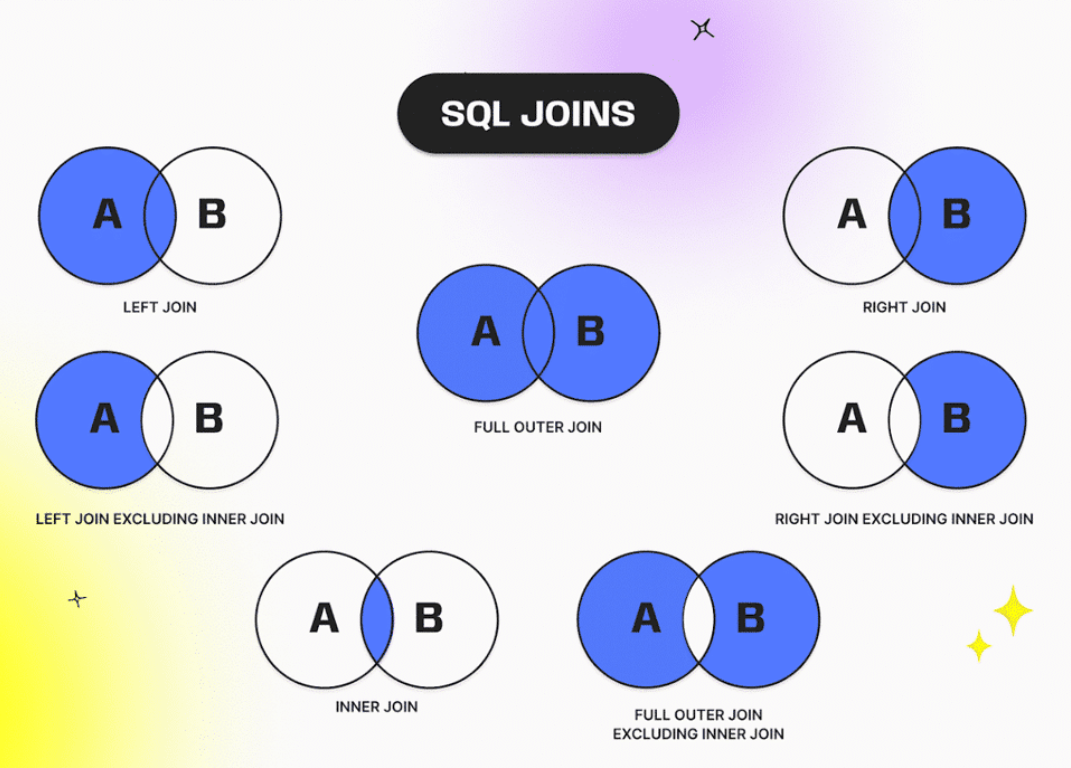

# JOIN!!!

## 2.1. INNER JOIN

El INNER JOIN es el tipo de JOIN más común y devuelve solo las filas que tienen coincidencias en ambas tablas. Si un registro de una tabla no tiene correspondencia en la otra, no será incluido en los resultados.

## 2.2. LEFT JOIN (o LEFT OUTER JOIN)

El LEFT JOIN devuelve todas las filas de la tabla de la izquierda (la primera tabla), junto con las filas coincidentes de la tabla de la derecha. Si no hay coincidencias, las columnas de la segunda tabla se completan con valores NULL

## 2.3. RIGHT JOIN (o RIGHT OUTER JOIN)

El RIGHT JOIN es lo opuesto al LEFT JOIN. Devuelve todas las filas de la tabla de la derecha (la segunda tabla) y las filas coincidentes de la tabla izquierda. Si no hay coincidencias, las columnas de la tabla izquierda se llenan con NULL .

## 2.4. FULL OUTER JOIN

El FULL OUTER JOIN devuelve todas las filas de ambas tablas. Si no hay coincidencia entre las tablas, los resultados incluirán NULL en las columnas donde falten datos de una de las tablas.


# 3 Unión e Intersección de Conjuntos en SQL

## 3.1 UNION

Las operaciones de conjuntos en SQL permiten combinar o comparar los resultados de varias consultas.

La operación UNION combina los resultados de dos consultas, eliminando los duplicados de manera predeterminada.x

```sql
SELECT columnas
FROM tabla1
UNION
SELECT columnas
FROM tabla2;
```

## 3.2 INTERSECT

La operación INTERSECT devuelve solo las filas que aparecen en ambas consultas.

# 4 Subconsultas en SQL

Las subconsultas en SQL son consultas anidadas dentro de otra consulta principal

## Subconsultas en la Cláusula WHERE

Las subconsultas en la cláusula WHERE permiten filtrar registros basándose en el resultado de otra consulta. Se ejecutan primero y su resultado es utilizado por la consulta externa

```sql
SELECT nombre, salario
FROM empleados
WHERE salario > (SELECT AVG(salario) FROM empleados);

```

## Subconsultas en la Cláusula SELECT

Las subconsultas en SELECT permiten calcular valores derivados en tiempo de ejecución.

```sql
SELECT nombre, salario,
       (SELECT AVG(salario)
        FROM empleados e2
        WHERE e1.departamento_id = e2.departamento_id) AS salario_promedio_departamento
FROM empleados e1;
```

# Consultas Anidadas

Las consultas anidadas son aquellas que dependen completamente de la consulta principal y se ejecutan para cada fila procesada por la consulta externa.


```sql
SELECT nombre, salario

FROM empleados

WHERE salario = (SELECT MAX(salario) FROM empleados);
```

# Consultas Derivadas (Derived Tables)

Las consultas derivadas son subconsultas en la cláusula FROM que generan una tabla temporal.

```sql
SELECT departamento_id, salario_promedio

FROM (SELECT departamento_id, AVG(salario) AS salario_promedio

      FROM empleados

      GROUP BY departamento_id) AS tabla_temporal

WHERE salario_promedio > 50000;
